# Cristallisation d’un produit actif pharmaceutique

On effectue une cristallisation d’un produit actif pharmaceutique dans un cristallisoir agité avec une vitesse relative entre les cristaux et la solution de 0,1 m/s. La vitesse de la cinétique d'intégration à la surface (réaction hétérogène) est d'ordre 2 et s'écrit :

$r=2.10^{-5}(c-c^*)^2\quad[kg/(m^2.s)]$

Le coefficient de transfert de matière autour des cristaux est déterminé à partir de la corrélation suivante :

$Sh=2+0.95Re^{0.5}Sc^{0.33}$ pour 2<Re<2000

On étudie la cristallisation pour les conditions opératoires suivantes de vitesse, u, de concentration en solution, c0, et du diamètre initial des cristaux, d0 :

		A -	u=0,1 m/s	c0=101 g/l	d0=0,5 mm
		
        B -	u=5 cm/s	c0=101 g/l	d0=0,5 mm
		
        C -	u=0,1 m/s	c0=110 g/l	d0=0,5 mm


*Données:* 
 - *diffusion du produit actif dans le solvant : 1.10-9 m2/s*
 - *masse volumique du produit cristallisé : 2000 kg/m3*
 - *masse molaire du produit actif : 1000 g/mol*
 - *solvant :	viscosité : 10-3 Pl	et masse volumique 1000 kg/m3*
 - *concentration à l'équilibre (saturation)		100 g/l*

**1) Calculer pour ces conditions le facteur d'efficacité de la cristallisation et en déduire le taux de croissance des cristaux en kg/(m2.s).**

>Pour déterminer la vitesse de réaction d'intégration et l'efficacité de procédé, il faut connaître la concentration en soluté à l'interface (i.e. où la cristallisation a lieu). Pour cela, il faut déterminer le profil de concentration en soluté dans la couche limite autour du cristal (i.e. la zone où la concentration en soluté est plus faible que dans la solution à cause de la consommation à la surface par la cristallisation).
>
>Il faut donc établir un bilan sur la matière différentiel (i.e. sur un élément de volume dans la couche limite). On établira ce bilan différentiel en coordonnées rectilignes (en supposant que l'épaisseur de la couche limite est petite par rapport à la taille du cristal) et en régime permanent. Dans ces conditions, on peut démontrer pour une cinétique de réaction hétérogène suivant la loi $r=k_r(c-c^*)^{or}$ que l'efficacité du procédé suit l'expression suivante :
>$$\eta=(1-\eta Da)^{or}$$
>avec un nombre de Damkholer (rapport entre la réaction et le transport de matière dans la couche limite $k=D/\delta$) qui s'écrit :
>$$Da=\frac{k_r(c_0-c^*)^{or-1}}{k}$$
>Le code ci dessous permet de calculer :
>1. l'épaisseur de la couche limite (et donc le coefficient de transfert de matière)
>2. le nombre de Damkholer
>3. le facteur d'efficacité
>4. le flux de matière à l'interface du cristal qui est aussi la vitesse de croissance des cristaux
>
>Notez que la détermination du facteur d'efficacité, $\eta$, est plus ou moins difficile selon l'ordre de réaction, $or$ : pour des ordres supérieurs à 2 la solution est déterminée numériquement par la méthode de Newton.

Sh= 6.76e+01
Da= 0.148
Efficiency= 0.782


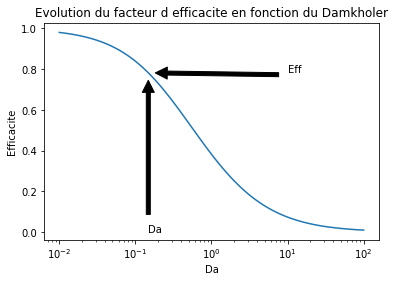

Taux de croissance ou flux de matière s integrant à l interface 1.56e-05 en kg/(m2.s)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
#DATA
#constant for the second order reaction
kr=2e-5
o_r=2
#hydro
u=0.1 #m/s
#solution
c0=101 #g/L
ceq=100 #g/L
ro=1000 #kg/m3
D=1.e-9 #m2/s
mu=0.001 #Pa s
#cristal
d0=5.e-4 #m

#COEFFICIENT DE MATIERE
#Reynolds
Re=ro*u*d0/mu
#Schmidt
Sc=mu/(ro*D)
#Sherwood
Sh=2+(0.95*Re**0.5*Sc**0.33)
print ('Sh=',"%.2e"%Sh)
k=Sh*D/d0
delta=D/k

#DAMKHOLER
Da=(kr*(c0-ceq)**(o_r-1))/k
print ('Da=', round(Da,3))

#EFFICIENCY 
if o_r==1 :
    def ef(Da):
        eff=1/(1+Da)
        return eff
if o_r==2 :
    def ef(Da):
        eff=1/Da + 1/(2*Da**2)-np.sqrt(1+4*Da)/(2*Da**2)
        return eff
if o_r>2 :
    def ef(Da):
        def f(eff):
            return eff-(1-eff*Da)**o_r
        eff=newton(f,x0=0.5)
        return eff
    
print ('Efficiency=',round(ef(Da),3))    
x=np.logspace(-2,2,100)
plt.semilogx(x,ef(x))
plt.annotate('Eff', xy=(Da, ef(Da)), xytext=(10,ef(Da)),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Da', xy=(Da, ef(Da)), xytext=(Da, 0),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.title('Evolution du facteur d efficacite en fonction du Damkholer')
plt.xlabel('Da')
plt.ylabel('Efficacite')
plt.show()

#taux de croissance
N=ef(Da)*kr*(c0-ceq)**o_r
print ('Taux de croissance ou flux de matière s integrant à l interface', "%.2e"%N, 'en kg/(m2.s)')



**2) Estimer d'après ces résultats, le temps nécessaire à une augmentation de 10% du diamètre des cristaux. Vous effectuerez un bilan matière sur un cristal en négligeant l'effet de l'augmentation du diamètre sur le taux de croissance des cristaux.**
>Au fur et à mesure de l'intrégration des molécules solubilisées sur le cristal, la taille et le volume du cristal va croitre. Le volume du cristal croît car il est alimenté par le flux de matière déterminé dans le 1). Pour décrire cette croissance, il faut effectuer un bilan sur le volume du cristal. L'enveloppe pour le bilan est alors la surface du cristal. L'accumulation dans le cristal est alors égale au flux de matière entrant : 
>$$ Accumulation = Entrée - Sortie +- terme source$$
>$$cdV=S.N.dt$$
>$$\rho_c\frac{4}{3}\pi\frac{dr_p^3}{dt}=4\pi r_p^2N$$
>$$\frac{dr_p}{dt}=\frac{N}{\rho_c}$$
>$$r_p=r_{p0}+\frac{N}{\rho_c}t$$
>Le temps pour que le diamètre augmente de 10% est alors :
>$$t=0.1\frac{r_{p0}\rho_c}{N}$$


In [5]:
t=0.1*(d0/2)*ro/N
print ('temps nécessaire à la croissance de 10% du cristal', "%.2e"%t, 's')

temps nécessaire à la croissance de 10% du cristal 1.60e+03 s


3) Commenter l'effet des conditions opératoires sur la croissance des cristaux :
		a)	vitesse relative solution/cristaux
		b)	concentration de sursaturation